In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir = Path("_data/2021-05-19")
train_dfs = list(train_dir.glob("*test.csv.zip"))
# print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_csv(train_df)
    out_df["findex"] = str(train_df).split("/")[-1].split(".")[0]
    out_df["tl_mavg"] = out_df.rolling(window=4)["test_loss"].mean()
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)
df = out_df

In [ ]:
print(out_df)

In [ ]:
out_df = out_df.iloc[1:]

In [3]:
sorted(list(out_df.columns))

['_batch_grad_norm',
 '_batch_grad_norm2',
 '_epochs',
 '_grad_mavg',
 '_initial_factor',
 '_initial_loss',
 '_initial_norm2',
 '_loss_mavg',
 '_num_examples',
 '_step_time',
 '_train_time',
 'approx_loss',
 'approx_rate',
 'batch_growth_rate',
 'batch_loss',
 'batch_size_',
 'damper',
 'damping',
 'dampingdelay',
 'dampingfactor',
 'dataset',
 'device_type',
 'dwell',
 'epoch_time',
 'epochs',
 'findex',
 'fn_class',
 'ident',
 'init_seed',
 'initial_batch_size',
 'len_dataset',
 'len_test_x',
 'len_test_y',
 'len_train_x',
 'len_train_y',
 'loss_name',
 'lr',
 'lr_',
 'max_batch_size',
 'model_updates',
 'momentum',
 'nesterov',
 'no_cuda',
 'num_examples',
 'num_params',
 'opt_name',
 'opt_param_dampening',
 'opt_param_eps',
 'opt_param_initial_accumulator_value',
 'opt_param_lr',
 'opt_param_lr_decay',
 'opt_param_momentum',
 'opt_param_nesterov',
 'opt_param_weight_decay',
 'random_state',
 'rho',
 'step_time',
 'test_accuracy',
 'test_device',
 'test_freq',
 'test_loss',
 'test_p

In [ ]:
ax = sns.lineplot(x="model_updates", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)
# ax.set_ylim(2**-20, 2**-4)

In [ ]:
out_df.describe()

In [ ]:
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

In [4]:
out_df.damper.unique()

array(['geodamp', 'radadamp', 'adagrad'], dtype=object)

In [ ]:
ax = sns.lineplot(x="model_updates", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 45000)
ax.set_ylim(1e-6, 1)

In [ ]:
ax = sns.lineplot(x="model_updates", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 15000)
# ax.set_ylim(2**-20, 2**-4)

In [ ]:
ax = sns.lineplot(x="epochs", y="test_loss", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

In [ ]:
ax = sns.lineplot(x="model_updates", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)
ax.set_ylim(2**-20, 2**-4)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.damper == "radadamp"]
#         show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="findex",
            hue_order=sorted(list(set(out_df["findex"]))),
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
#         if "loss" in y and "updates" in x:
#             ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
#         if "acc" in y and "updates" in x:
#             ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "loss" in y or "model" in x:
            ax.legend_.remove()

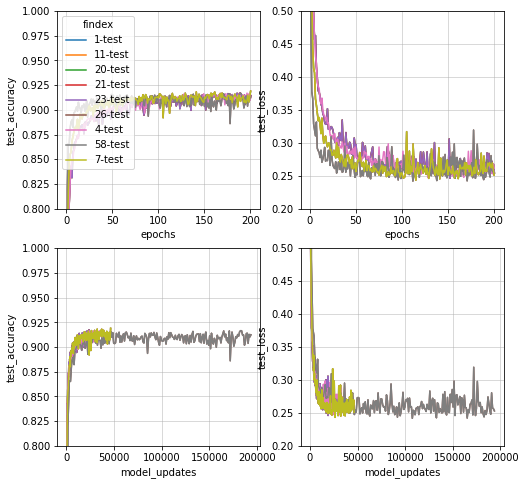

In [5]:
t = df.copy()
t = t[t.damper == "radadamp"]
t = t[t.epochs > 100]
t = t[t.tl_mavg > 0.3]

import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[~show["findex"].isin(set(t["findex"]))]
        show = show[show.damper == "radadamp"]
#         show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="findex",
            hue_order=sorted(list(set(show["findex"]))),
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
#         if "loss" in y and "updates" in x:
#             ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
#         if "acc" in y and "updates" in x:
#             ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "loss" in y or "model" in x:
            ax.legend_.remove()

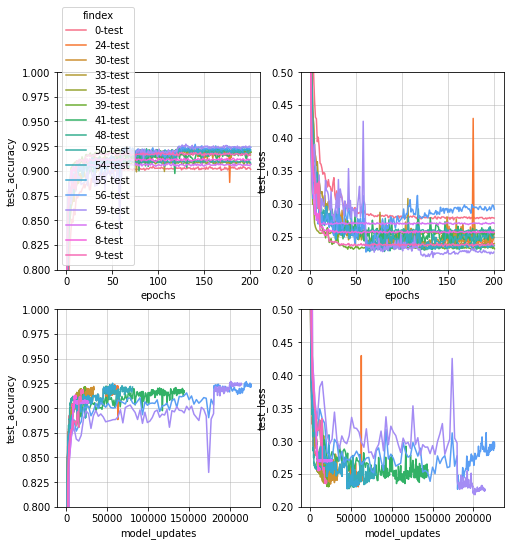

In [6]:
t = df.copy()
t = t[t.damper == "geodamp"]
t = t[t.epochs > 100]
t = t[t.tl_mavg > 0.3]

import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[~show["findex"].isin(set(t["findex"]))]
        show = show[show.damper == "geodamp"]
#         show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="findex",
            hue_order=sorted(list(set(show["findex"]))),
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
#         if "loss" in y and "updates" in x:
#             ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
#         if "acc" in y and "updates" in x:
#             ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "loss" in y or "model" in x:
            ax.legend_.remove()

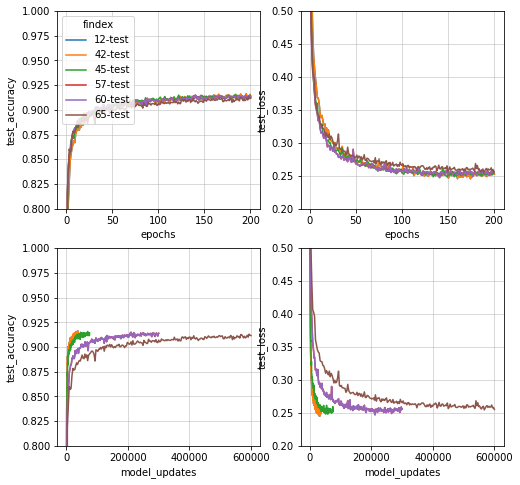

In [7]:
t = df.copy()
t = t[t.damper == "adagrad"]
t = t[t.epochs > 100]
t = t[t.tl_mavg > 0.3]

import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[~show["findex"].isin(set(t["findex"]))]
        show = show[show.damper == "adagrad"]
#         show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="findex",
            hue_order=sorted(list(set(show["findex"]))),
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
#         if "loss" in y and "updates" in x:
#             ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
#         if "acc" in y and "updates" in x:
#             ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "loss" in y or "model" in x:
            ax.legend_.remove()

In [ ]:
show = df.copy()
show["epochs_binned"] = show["epochs"].astype(int)
show = show.pivot_table(index="epochs_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)

In [ ]:
show = df.copy()
show["model_updates_binned"] = (show["model_updates"]/100).astype(int)*100
show = show.pivot_table(index="model_updates_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)